In [8]:
import pandas as pd
from datetime import datetime, timedelta
import os


## Corn GDD class

In [2]:

def fahrenheit_to_celsius(temp_f):
    return (temp_f - 32) * 5/9
#Class for corn GDD 
class CornGDD:
    def __init__(self, daily_temp_df, time_column, min_temp_column, max_temp_column, celsius=True):
        self.daily_temp_df = daily_temp_df
        self.time_column = time_column
        self.min_temp_column = min_temp_column
        self.max_temp_column = max_temp_column
        self.celsius = celsius

        # Ensure the time column is of datetime type
        self.daily_temp_df[self.time_column] = pd.to_datetime(self.daily_temp_df[self.time_column])

        # Convert the temperature to Celsius if required
        if not self.celsius:
            self.daily_temp_df[self.min_temp_column] = self.daily_temp_df[self.min_temp_column].apply(fahrenheit_to_celsius)
            self.daily_temp_df[self.max_temp_column] = self.daily_temp_df[self.max_temp_column].apply(fahrenheit_to_celsius)
    
    def con_gdd(self, start_date, end_date):
        start_date = pd.Timestamp(start_date)
        end_date = pd.Timestamp(end_date)

        date_mask = (self.daily_temp_df[self.time_column] >= start_date) & (self.daily_temp_df[self.time_column] <= end_date)
        masked_data = self.daily_temp_df.loc[date_mask].copy()

        gdd_values = []
        cumulative_gdd = 0

        for index, row in masked_data.iterrows():
            min_temp = max(row[self.min_temp_column], 10 if self.celsius else 50)
            max_temp = max(min(row[self.max_temp_column], 30 if self.celsius else 86), min_temp)

            mean_temp = (min_temp + max_temp) / 2
            base_temp = 10 if self.celsius else 50
            gdd = max(mean_temp - base_temp, 0)

            gdd_values.append(gdd)
            cumulative_gdd += gdd

        masked_data['GDD'] = gdd_values
        masked_data['Cumulative_GDD'] = masked_data['GDD'].cumsum()

        return masked_data

In [3]:
#Read the datasets 
Wadena = pd.read_csv("Wadena_County_NOAA_nClimGrid.csv")
Cass = pd.read_csv("Cass_County_NOAA_nClimGrid.csv")
Crow_Wing = pd.read_csv("Crow_Wing_County_NOAA_nClimGrid.csv")
Todd = pd.read_csv("Todd_County_NOAA_nClimGrid.csv")
Morrison = pd.read_csv("Morrison_County_NOAA_nClimGrid.csv")
Douglas = pd.read_csv("Douglas_County_NOAA_nClimGrid.csv")
Otter_Tail = pd.read_csv("Otter_Tail_County_NOAA_nClimGrid.csv")
Pope = pd.read_csv("Pope_County_NOAA_nClimGrid.csv")
Stearns = pd.read_csv("Stearns_County_NOAA_nClimGrid.csv")
Sherburne = pd.read_csv("Sherburne_County_NOAA_nClimGrid.csv")
Benton = pd.read_csv("Benton_County_NOAA_nClimGrid.csv")
Becker = pd.read_csv("Becker_County_NOAA_nClimGrid.csv")
Hubbard= pd.read_csv("Hubbard_County_NOAA_nClimGrid.csv")
Kandiyohi= pd.read_csv("Kandiyohi_County_NOAA_nClimGrid.csv")

## calculate GDD each year each county keeping 4-15 as planting date

In [4]:
# Function to convert Celsius to Fahrenheit for GDD
def celsius_to_fahrenheit(c):
    return (c * 9/5)
"""
https://www.linkedin.com/pulse/unit-transformation-degree-days-between-celsius-fahrenheit-yin/
"""
# Dictionary of county DataFrames
county_dfs = {
    "Wadena": Wadena,
    "Cass": Cass,
    "Crow_Wing": Crow_Wing,
    "Todd": Todd,
    "Morrison": Morrison,
    "Douglas": Douglas,
    "Otter_Tail": Otter_Tail,
    "Pope": Pope,
    "Stearns": Stearns,
    "Sherburne": Sherburne,
    "Benton": Benton,
    "Becker": Becker,
    "Hubbard": Hubbard,
    "Kandiyohi": Kandiyohi
}

# Loop through each county
for county_name, df in county_dfs.items():
    df['time'] = pd.to_datetime(df['time'])
    all_years = []

    for year in range(1951, 2025):
        corn = CornGDD(df, 'time', 'tmin', 'tmax')  # Output in Celsius
        start = pd.to_datetime(f"{year}-04-15").date()
        end = pd.to_datetime(f"{year}-12-31").date()

        gdd_df = corn.con_gdd(start, end)
        gdd_df['Year'] = year

        # Manually convert GDD to Fahrenheit
        gdd_df['GDD'] = gdd_df['GDD'].apply(celsius_to_fahrenheit)
        gdd_df['Cumulative_GDD'] = gdd_df['GDD'].cumsum()

        all_years.append(gdd_df)

    historical_df = pd.concat(all_years, ignore_index=True)
    historical_df.to_csv(f"{county_name}_growing2024_Corn_GDD_1951_2024.csv", index=False)
    print(f"Saved: {county_name}_growing2024_Corn_GDD_1951_2024.csv")

Saved: Wadena_growing2024_Corn_GDD_1951_2024.csv
Saved: Cass_growing2024_Corn_GDD_1951_2024.csv
Saved: Crow_Wing_growing2024_Corn_GDD_1951_2024.csv
Saved: Todd_growing2024_Corn_GDD_1951_2024.csv
Saved: Morrison_growing2024_Corn_GDD_1951_2024.csv
Saved: Douglas_growing2024_Corn_GDD_1951_2024.csv
Saved: Otter_Tail_growing2024_Corn_GDD_1951_2024.csv
Saved: Pope_growing2024_Corn_GDD_1951_2024.csv
Saved: Stearns_growing2024_Corn_GDD_1951_2024.csv
Saved: Sherburne_growing2024_Corn_GDD_1951_2024.csv
Saved: Benton_growing2024_Corn_GDD_1951_2024.csv
Saved: Becker_growing2024_Corn_GDD_1951_2024.csv
Saved: Hubbard_growing2024_Corn_GDD_1951_2024.csv
Saved: Kandiyohi_growing2024_Corn_GDD_1951_2024.csv


# Simulating 4-15 to 6-15 planting dates. Here we are recalculating each planting dates from 4-15 to 6-15 for each year each county from 1951 to 2024

In [9]:
# Function to convert Celsius to Fahrenheit for GDD
def celsius_to_fahrenheit(c):
    return (c * 9/5)
"""
https://www.linkedin.com/pulse/unit-transformation-degree-days-between-celsius-fahrenheit-yin/
"""

# Function to get list of planting dates
def generate_planting_dates(start_date, end_date):
    return [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]
# Output folder path
output_folder = "Corn_Simulated AllCounties_GDD_1951_2024"
os.makedirs(output_folder, exist_ok=True)

# Dictionary of county GDD data
county_dfs = {
    "Wadena": Wadena,
    "Cass": Cass,
    "Crow_Wing": Crow_Wing,
    "Todd": Todd,
    "Morrison": Morrison,
    "Douglas": Douglas,
    "Otter_Tail": Otter_Tail,
    "Pope": Pope,
    "Stearns": Stearns,
    "Sherburne": Sherburne,
    "Benton": Benton,
    "Becker": Becker,
    "Hubbard": Hubbard,
    "Kandiyohi": Kandiyohi
}

# Loop through each county and year
for county_name, df in county_dfs.items():
    df['time'] = pd.to_datetime(df['time'])

    all_planting_results = []
    for year in range(1951, 2025):
        corn = CornGDD(df, 'time', 'tmin', 'tmax') 
        start_year = pd.to_datetime(f"{year}-04-15")
        end_year = pd.to_datetime(f"{year}-12-31")
        full_gdd_df = corn.con_gdd(start_year.date(), end_year.date())
        full_gdd_df['time'] = pd.to_datetime(full_gdd_df['time'])
        full_gdd_df['GDD'] = celsius_to_fahrenheit(full_gdd_df['GDD'])

        planting_dates = generate_planting_dates(pd.to_datetime(f"{year}-04-15"), pd.to_datetime(f"{year}-06-15"))

        for planting_date in planting_dates:
            sub_df = full_gdd_df[full_gdd_df['time'] >= planting_date].copy()
            sub_df['Year'] = year
            sub_df['Planting Date'] = planting_date.date()
            sub_df['DAP'] = (sub_df['time'] - planting_date).dt.days
            sub_df['Cumulative_GDD'] = sub_df['GDD'].cumsum()
            all_planting_results.append(sub_df)

    historical_df = pd.concat(all_planting_results, ignore_index=True)
    output_path = os.path.join(output_folder, f"{county_name}_AllPlantingDates_Corn_GDD_1951_2024.csv")
    historical_df.to_csv(output_path, index=False)
    print(f"Saved: {output_path}")

Saved: Corn_Simulated AllCounties_GDD_1951_2024/Wadena_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Cass_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Crow_Wing_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Todd_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Morrison_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Douglas_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Otter_Tail_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Pope_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Stearns_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951_2024/Sherburne_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Corn_Simulated AllCounties_GDD_1951

###  Keeping Becker "Becker 2024 corn Growth staging.csv" 2024 data growth stages as threshold for each year each county.
#### We are cleaning the data and getting mode for becker and then using that as a threshold

In [10]:
import pandas as pd
import os

# All counties
counties = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Hubbard", "Kandiyohi"
]
output_folder = "AllCounties_CornGrowthStages_1951_2022_withBeckerRef"
os.makedirs(output_folder, exist_ok=True)

#Step 1: Load Becker 2024 thresholds for corn
becker = pd.read_csv("Becker 2024 corn Growth staging.csv") 
becker.columns = becker.columns.str.strip()
becker["Date"] = pd.to_datetime(becker["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

# Set reference planting date which is May 1 for Becker
planting_date_2024 = pd.Timestamp("2024-05-01")

# Define ordered corn stages and getting DAP for Becker
ordered_stages = [
    'VE', 'V2', 'V4', 'V6', 'V8','V10', 'VT','R1', 'R2', 'R3', 'R4', 'R5', 'R6'
]
becker_stage_data = becker[["Growth Stage", "Date", "AGDD"]].dropna()
becker_stage_data["Becker DAP"] = (becker_stage_data["Date"] - planting_date_2024).dt.days
becker_thresholds = (
    becker_stage_data
    .drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
    .rename(columns={"Growth Stage": "Stage", "AGDD": "Becker AGDD"})
)
becker_thresholds = becker_thresholds[becker_thresholds["Stage"].isin(ordered_stages)].reset_index(drop=True)

# Step 2: Process Each County 
for county in counties:
    input_file = f"Corn_Simulated AllCounties_GDD_1951_2024/{county}_AllPlantingDates_Corn_GDD_1951_2024.csv"  
    if not os.path.exists(input_file):
        print(f"File not found: {input_file}")
        continue

    df = pd.read_csv(input_file)
    df["time"] = pd.to_datetime(df["time"])
    df["Planting Date"] = pd.to_datetime(df["Planting Date"])
    df = df[df["Year"].between(1951, 2025)].copy()

    results = []
    for (year, planting), group in df.groupby(["Year", "Planting Date"]):
        group = group[group["time"] >= planting].sort_values("time").copy()
        group["Cumulative_GDD"] = group["GDD"].cumsum()

        for _, row in becker_thresholds.iterrows():
            stage = row["Stage"]
            becker_agdd = row["Becker AGDD"]
            becker_dap = row["Becker DAP"]

            met = group[group["Cumulative_GDD"] >= becker_agdd]
            if not met.empty:
                first_hit = met.iloc[0]
                dap_reached = (first_hit["time"] - planting).days
                agdd_reached = round(first_hit["Cumulative_GDD"], 1)
                results.append({
                    "Crop": "Corn",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "Becker DAP": becker_dap,
                    "DAP Reached": dap_reached,
                    "Δ DAP": dap_reached - becker_dap,
                    "Becker AGDD (°F)": round(becker_agdd, 2),
                    "AGDD Reached (°F)": agdd_reached,
                    "Delta AGDD (Compared to Becker)": round(agdd_reached - becker_agdd, 1)
                })
            else:
                results.append({
                    "Crop": "Corn",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "Becker DAP": becker_dap,
                    "DAP Reached": "",
                    "Δ DAP": "",
                    "Becker AGDD (°F)": round(becker_agdd, 2),
                    "AGDD Reached (°F)": "",
                    "Delta AGDD (Compared to Becker)": ""
                })

    out_df = pd.DataFrame(results)
    out_path = f"{output_folder}/{county}_Corn_GrowthStages_1951_2022_with_BeckerReference.csv"
    out_df.to_csv(out_path, index=False)
    print(f"Saved: {out_path}")


Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Wadena_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Cass_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Crow_Wing_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Todd_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Morrison_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Douglas_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Otter_Tail_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Pope_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_

In [11]:
import pandas as pd
import os
import glob

# Set the folder containing your corn CSV files
input_folder = "AllCounties_CornGrowthStages_1951_2022_withBeckerRef"
output_file = "AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv"

# Get a list of all CSV files in the folder
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

# Combine all CSV files into one DataFrame
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv(output_file, index=False)

print(f"Combined CSV saved as: {output_file}")


Combined CSV saved as: AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv


## Start Visualization of the datasets

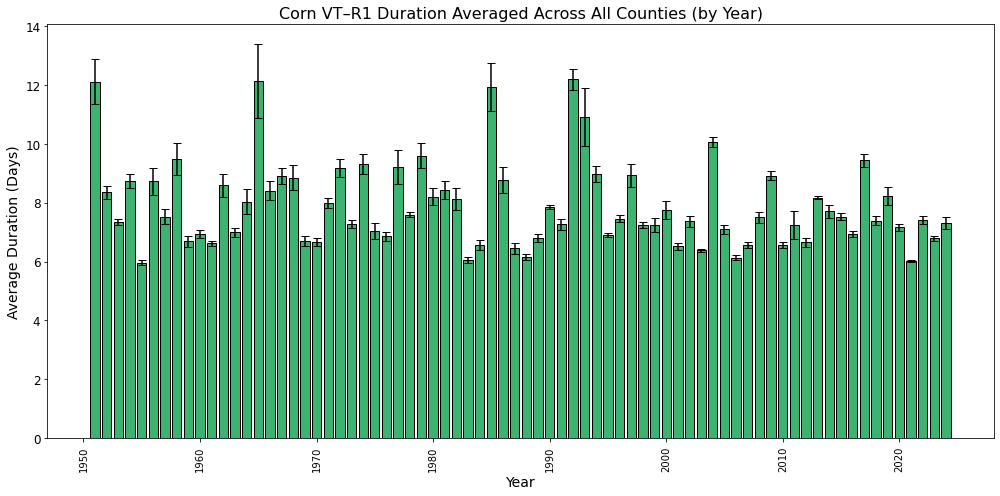

In [12]:
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")

# Filter for V8 and R3 stages
df_filtered = df[df["Stage"].isin(["VT", "R1"])]

# Pivot DAP values by Stage
dap_pivot = df_filtered.pivot_table(
    index=["Year", "County"],
    columns="Stage",
    values="DAP Reached"
).reset_index()

#Drop rows with missing V8 or R3
dap_pivot = dap_pivot.dropna(subset=["VT", "R1"])

# Compute duration from V8 to R3
dap_pivot["VT_to_R1_Duration"] = dap_pivot["R1"] - dap_pivot["VT"]

#  Average duration across counties, per year
yearly_avg = dap_pivot.groupby("Year")["VT_to_R1_Duration"].agg(['mean', 'sem']).reset_index()

# Plot
plt.figure(figsize=(14, 7))
plt.bar(
    yearly_avg["Year"],
    yearly_avg["mean"],
    yerr=yearly_avg["sem"],
    color='mediumseagreen',
    edgecolor='black',
    capsize=4
)

plt.title("Corn VT–R1 Duration Averaged Across All Counties (by Year)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Duration (Days)", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(False)
plt.show()


In [13]:
import pandas as pd

# Load the data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")

# Filter for V8, R1, and R3 stages
df_filtered = df[df["Stage"].isin(["V8", "R1", "R3"])]

# Pivot to get DAP values for each stage
dap_pivot = df_filtered.pivot_table(
    index=["Year", "County", "Planting Date"],
    columns="Stage",
    values="DAP Reached"
).reset_index()

# Drop rows with missing V8, R1, or R3 values
dap_pivot = dap_pivot.dropna(subset=["V8", "R1", "R3"])

# Calculate durations
dap_pivot["V8_to_R1_Duration"] = dap_pivot["R1"] - dap_pivot["V8"]
dap_pivot["V8_to_R3_Duration"] = dap_pivot["R3"] - dap_pivot["V8"]

# Select relevant columns
output_df = dap_pivot[["Year", "County", "Planting Date", "V8_to_R1_Duration", "V8_to_R3_Duration"]]

# Save to CSV
output_df.to_csv("Corn_V8_to_R1_and_R3_Duration_By_County_and_PlantingDate.csv", index=False)

print("CSV file 'Corn_V8_to_R1_and_R3_Duration_By_County_and_PlantingDate.csv' created successfully.")



CSV file 'Corn_V8_to_R1_and_R3_Duration_By_County_and_PlantingDate.csv' created successfully.


In [14]:
dap_pivot

Stage,Year,County,Planting Date,R1,R3,V8,V8_to_R1_Duration,V8_to_R3_Duration
0,1951,Benton,1951-04-15,112.0,154.0,82.0,30.0,72.0
1,1951,Benton,1951-04-16,111.0,153.0,81.0,30.0,72.0
2,1951,Benton,1951-04-17,110.0,152.0,80.0,30.0,72.0
3,1951,Benton,1951-04-18,109.0,151.0,79.0,30.0,72.0
4,1951,Benton,1951-04-19,108.0,150.0,78.0,30.0,72.0
...,...,...,...,...,...,...,...,...
59639,2024,Wadena,2024-06-11,81.0,113.0,47.0,34.0,66.0
59640,2024,Wadena,2024-06-12,80.0,113.0,47.0,33.0,66.0
59641,2024,Wadena,2024-06-13,80.0,115.0,46.0,34.0,69.0
59642,2024,Wadena,2024-06-14,81.0,116.0,46.0,35.0,70.0


In [15]:
yearly_avg

,Year,mean,sem
0,1951,12.097711,0.765756
1,1952,8.351117,0.215669
2,1953,7.344913,0.092969
3,1954,8.734491,0.244709
4,1955,5.955335,0.086108
...,...,...,...
69,2020,7.167494,0.120761
70,2021,6.019851,0.047277
71,2022,7.409429,0.138356
72,2023,6.785360,0.088123


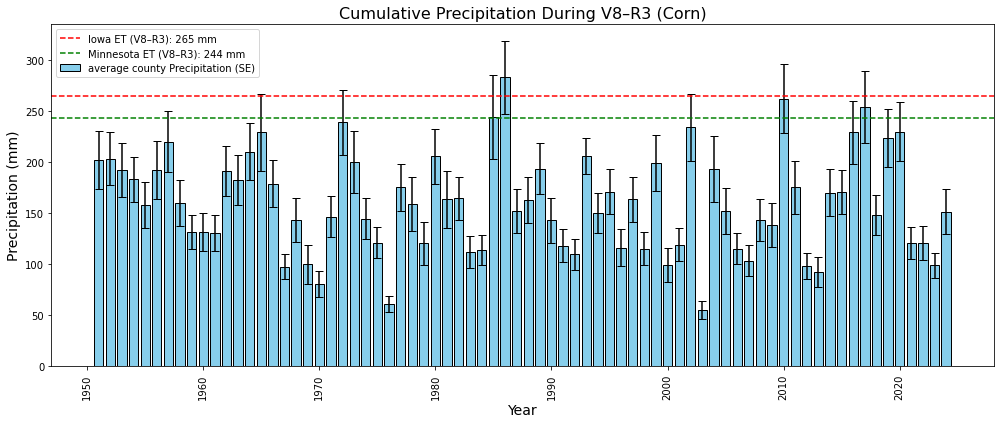

In [16]:

import numpy as np

# Iowa and Minnesota ET benchmark (in mm)
et_iowa_mm = 265.15         # V8–R3 ET from Iowa
et_minnesota_mm = 243.84    # V8–R3 ET from Minnesota

# Load data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")
noaa = pd.read_csv("Combined_NOAA_nClimGrid_AllCounties.csv")

# Preprocessing
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")
noaa["time"] = pd.to_datetime(noaa["time"])

# Filter for V8 and R3 stages
stage_date_df = df[df["Stage"].isin(["V8", "R3"])]
date_pivot = stage_date_df.pivot_table(
    index=["County", "Year"],
    columns="Stage",
    values="Stage Date"
).reset_index().dropna()

# Compute cumulative precipitation
precip_data = []
for _, row in date_pivot.iterrows():
    county = row["County"]
    year = row["Year"]
    start = row["V8"]
    end = row["R3"]

    mask = (
        (noaa["County"] == county) &
        (noaa["time"] >= start) &
        (noaa["time"] <= end)
    )
    total_precip = noaa.loc[mask, "prcp"].sum()

    precip_data.append({
        "County": county,
        "Year": year,
        "Cumulative Precipitation (mm)": total_precip
    })

precip_df = pd.DataFrame(precip_data)

# Compute mean and SEM
summary = precip_df.groupby("Year")["Cumulative Precipitation (mm)"].agg(['mean', 'sem']).reset_index()

# Plot with SEM and ET reference lines
plt.figure(figsize=(14, 6))
plt.bar(
    summary["Year"],
    summary["mean"],
    yerr=summary["sem"],
    capsize=4,
    color='skyblue',
    edgecolor='black',
    label='average county Precipitation (SE)'
)

# Add ET lines
plt.axhline(y=et_iowa_mm, color='red', linestyle='--', label=f'Iowa ET (V8–R3): {et_iowa_mm:.0f} mm')
plt.axhline(y=et_minnesota_mm, color='green', linestyle='--', label=f'Minnesota ET (V8–R3): {et_minnesota_mm:.0f} mm')

# Final plot styling
plt.title("Cumulative Precipitation During V8–R3 (Corn)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Precipitation (mm)", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()
